In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = sm.datasets.co2.load_pandas().data

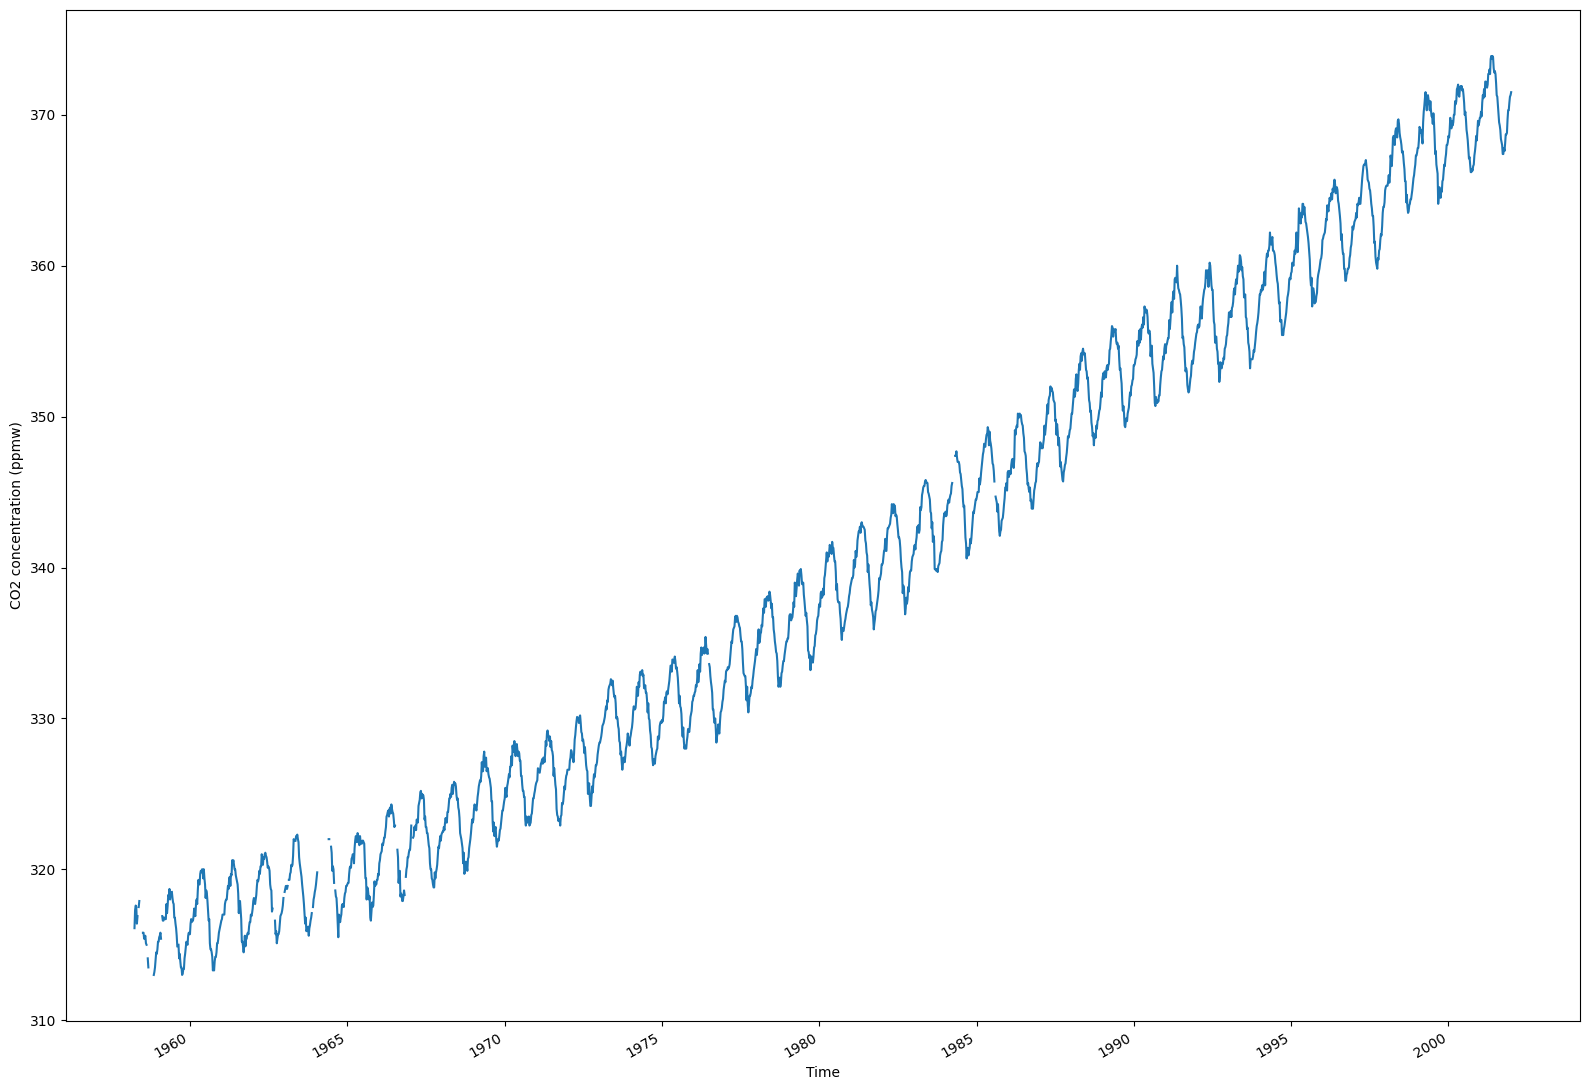

In [3]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(data['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 concentration (ppmw)')
fig.autofmt_xdate()
plt.tight_layout()

In [4]:
data = data.interpolate()

In [5]:
def window_input(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['co2'].shift(-i)
        i = i + 1
        
    if i == window_length:
        df['y'] = df['co2'].shift(-i)
        
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
        
    return df

In [6]:
new_df = window_input(5, data)

In [9]:
from sklearn.model_selection import train_test_split

X = new_df[['co2', 'x_1', 'x_2', 'x_3', 'x_4']].values
y = new_df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_test

array([[349.4, 349.2, 349.7, 349.8, 350.1],
       [349.2, 349.7, 349.8, 350.1, 350.4],
       [349.7, 349.8, 350.1, 350.4, 350.5],
       ...,
       [368.8, 369.7, 370.3, 370.3, 370.8],
       [369.7, 370.3, 370.3, 370.8, 371.2],
       [370.3, 370.3, 370.8, 371.2, 371.3]])